# **Training Models for Startup Success**


Following our previous work on preparing data about startups. This article moves to the next step: building and refining a model to predict startup success.

We'll use the cleaned data from our earlier article, "Analyzing Key Factors That Lead to Successful Startups," as the starting point.
 
Our discussion will cover training this model, adjusting its settings for better results, and checking how well it predicts outcomes. This piece aims to clearly explain how to transform prepared data into a tool for forecasting the success of startups, building directly on our prior efforts.

We’ll take a comprehensive look at the crucial process of Model Training.
Workflow : 

- Sections
- Data Preparation
- Model Selection
- Model Training
- Validation
- Hyperparameter Tuning

 ####  **Importing essential libraries**

 These libraries provide the necessary tools and functions for data manipulation, analysis, and visualization.

In [859]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble

We're advancing our analysis by utilizing the cleaned dataset from our previous article on preprocessing for startup success prediction. 

 ####  **Loading our clean data**

In [860]:
notebook_directory = 'notebooks'
file_name = 'cleaned_data.csv'
file_path = os.path.join('..', 'notebooks', 'cleaned_data.csv')
data_df = pd.read_csv(file_path, encoding="ISO-8859-1")

Now that our data is loaded, let's begin with the first step of the process.

####  **Data Segmentation**


Data segmentation is the process where we split the dataset into parts for training and testing the model. It helps the model learn from one part and get tested on another. This step is key for making the model predict well.

Defining inputs and the target variable is crucial as it guides the model on what information to use for predictions and which outcome to forecast. Inputs, also known as features, are the data points the model analyzes, while the target variable is what we're trying to predict. 

In [861]:
inputs= data_df.drop('status', axis=1)  
target = data_df['status']

To split the dataset into parts for training and testing the model we will use the following train_test_split function.

In [862]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

With test_size=0.2, we use 20% of the data for testing and the rest for training.
random_state=42 makes sure the split is the same every time we run the code.

After splitting our data, let's proceed to the next step: training our model

####  **Model Training**

Model training is the transformative process where algorithms learn from data to make predictions, classifications, or decisions.

Before training our model, we need to decide which model will be the best choice. To do this, we will apply cross-validation."

**How to evaluate machine learning models and select the best one?**

So in this case we will use cross validation 

**Cross Validation**

Cross-validation is a method used to evaluate the performance of a machine learning model. Divides the dataset into folds. It trains the model on some folds and tests it on others, ensuring each data point is used for both training and validation.

In this scenario, we apply cross-validation to three models:

- Random Forest 
- Gradient Boosting 
- Decision Tree Classifier 
  
By utilizing the cross_val_score function, we can evaluate how well each model performs without altering their settings. This approach enables us to identify which model is most effective with our data right from the beginning.

Let's commence with the first model: Decision Tree.

**Decision Tree Classifier** 

A Decision Tree Classifier is a machine learning model that makes decisions based on asking a series of questions. It splits the data into smaller groups based on the answers, working its way down the tree until it reaches a decision on the class or category. 

**Random Forest**

**Gradient Boosting**


Gradient Boosting is a machine learning technique used to build powerful prediction models. Gradient Boosting learns from its mistakes by repeatedly building models that correct the errors of previous ones, leading to a very accurate final prediction model.

Lets have a look what is the score when applying this method.

In [863]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

def perform_cross_validation(models, x_train, y_train, kf):
    """
    Perform cross-validation for multiple models.
    
    Args:
    - models (dict): A dictionary where keys are model names and values are model instances.
    - x_train (array-like): Training features.
    - y_train (array-like): Training labels.
    - kf: Cross-validation strategy.
    
    Returns:
    - results (dict): A dictionary containing the average accuracy scores for each model.
    """
    results = {}
    for model_name, model in models.items():
        scores = cross_val_score(model, x_train, y_train, cv=kf, scoring="accuracy")
        average_score = scores.mean()
        results[model_name] = average_score
        print(f'Model: {model_name}')
        print(f'Scores for each fold: {scores}')
        print(f'Average score: {average_score:.2f}\n')
    return results

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Define KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
results = perform_cross_validation(models, x_train, y_train, kf)


Model: Decision Tree
Scores for each fold: [0.99324324 0.97972973 0.97297297 0.97959184 0.95238095]
Average score: 0.98

Model: Gradient Boosting
Scores for each fold: [0.99324324 0.96621622 0.98648649 0.99319728 0.98639456]
Average score: 0.99

Model: Random Forest
Scores for each fold: [0.98648649 0.97972973 0.99324324 0.99319728 0.99319728]
Average score: 0.99



Random Forest has the best average score of 0.99 and is selected for building the final model. 

In [864]:
# cv_results = pd.DataFrame({
#     "Algorithm": ["RandomForest", "GradientBoosting", "DecisionTree"],
#     "CrossValMeans": [pd.Series(score_rf).mean(), pd.Series(score_gb).mean(), pd.Series(score_dt).mean()],
#     "CrossValErrors": [pd.Series(score_rf).std(), pd.Series(score_gb).std(), pd.Series(score_dt).std()]
# })

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.barh(cv_results["Algorithm"], cv_results["CrossValMeans"], xerr=cv_results["CrossValErrors"], color="skyblue")
# plt.xlabel("Mean Accuracy")
# plt.title("Cross validation scores")
# plt.show()

####  **Optimizing hyperparameters with SearchGridCV** ###

So now that i have found the best model, i will aplied grid search to find the best hyperparameter.

Optimizing hyperparameters with GridSearchCV refers to a technique used in machine learning to find the best combination of hyperparameters for a given model. Hyperparameters are settings that are not learned by the model during training but are set before the training process begins. 

In [865]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

def perform_grid_search(models, x_train, y_train, kf):
    """
    Perform GridSearchCV for multiple models.
    
    Args:
    - models (dict): A dictionary where keys are model names and values are tuples containing model instances
                     and corresponding parameter grids.
    - x_train (array-like): Training features.
    - y_train (array-like): Training labels.
    - kf: Cross-validation strategy.
    
    Returns:
    - best_models (dict): A dictionary containing the best models for each model name.
    """
    best_models = {}
    for model_name, (model, param_grid) in models.items():
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
        best_model = grid_search.fit(x_train, y_train)
        best_models[model_name] = best_model
        print(f"{model_name} Best Hyperparameters:", best_model.best_params_)
        print(f"{model_name} Best Accuracy:", best_model.best_score_)
    return best_models

# Define the parameter grids for each model
param_grids = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
    }),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.5],
    }),
}

# Call the function to perform grid search
best_models = perform_grid_search(param_grids, x_train, y_train, kf)

Random Forest Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best Accuracy: 0.9891708034565176
Decision Tree Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5}
Decision Tree Best Accuracy: 0.9850891708034565
Gradient Boosting Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
Gradient Boosting Best Accuracy: 0.9905221548078689


These results provide valuable insights into the optimal settings for the Random Forest model and its corresponding accuracy, helping to improve its performance in making predictions on unseen data.

In [866]:
#best_model will hold the trained machine learning model 
#with the optimal hyperparameters identified by GridSearchCV.
# Save the best models and their attributes
best_random_forest_model = best_models['Random Forest'].best_estimator_
best_decision_tree_model = best_models['Decision Tree'].best_estimator_
best_gradient_boosting_model = best_models['Gradient Boosting'].best_estimator_

random_forest_feature_importances = best_random_forest_model.feature_importances_
decision_tree_feature_importances = best_decision_tree_model.feature_importances_
gradient_boosting_feature_importances = best_gradient_boosting_model.feature_importances_

feature_names = x_train.columns

Indices will contain the indices that sort the feature importances in ascending order, allowing for easy access to features based on their importance scores. 

In [867]:
indices = np.argsort(feature_importances)

SelectFromModel is a powerful tool in scikit-learn for automating feature selection based on the importance scores derived from pre-trained models. By leveraging this method, practitioners can streamline their workflows, improve model interpretability, and enhance overall model performance.

In [868]:
from sklearn.feature_selection import SelectFromModel
# Use the best model for feature selection
sel = SelectFromModel(best_model)
sel.fit(x_train, y_train)
# Get selected features
selected_feat = x_train.columns[sel.get_support()]
# Print or use the selected features as needed
print(selected_feat)

Index(['closed_at'], dtype='object')


These features have been deemed as the most important or informative for your machine learning model based on the feature importances provided by the model.

We will create a plot to compare the importance of each feature:

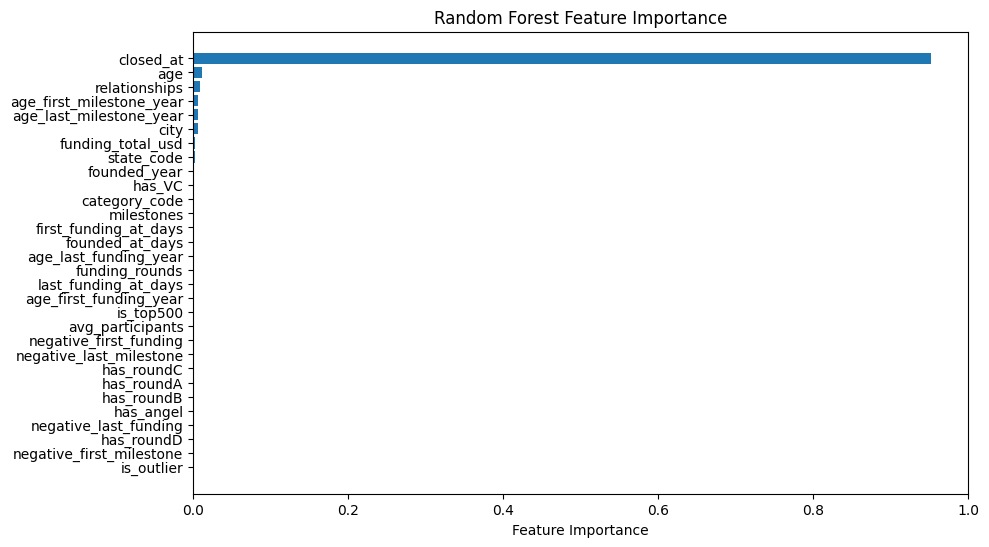

In [869]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

IndexError: list index out of range

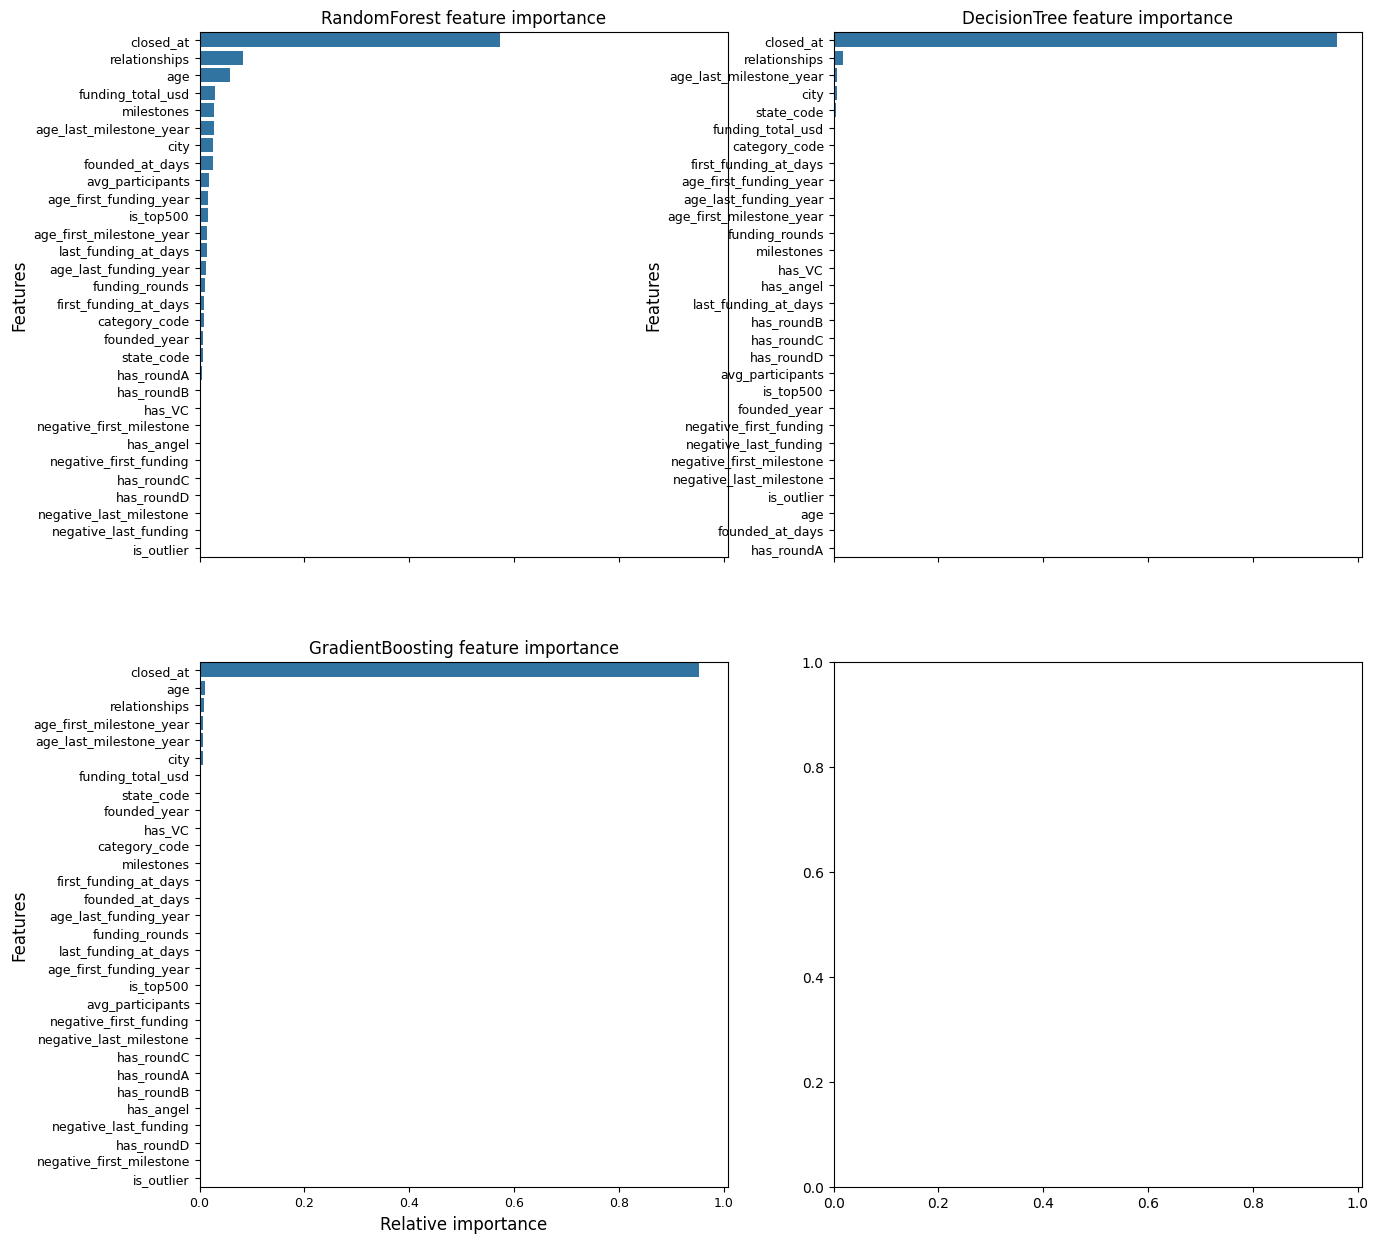

In [870]:
# import numpy as np
# import seaborn as sns


# nrows = ncols = 2
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex="all", figsize=(15, 15))

# names_classifiers = [("RandomForest", best_random_forest_model), 
#                      ("DecisionTree", best_decision_tree_model), 
#                      ("GradientBoosting", best_gradient_boosting_model)]

# nclassifier = 0
# for row in range(nrows):
#     for col in range(ncols):
#         name = names_classifiers[nclassifier][0]
#         classifier = names_classifiers[nclassifier][1]
#         indices = np.argsort(classifier.feature_importances_)[::-1][:40]
#         g = sns.barplot(y=feature_names[indices][:40], x=classifier.feature_importances_[indices][:40], orient='h', ax=axes[row][col])
#         g.set_xlabel("Relative importance", fontsize=12)
#         g.set_ylabel("Features", fontsize=12)
#         g.tick_params(labelsize=9)
#         g.set_title(name + " feature importance")
#         nclassifier += 1

# # Optional: Make predictions using the best models on the test set
# test_predictions_RFC = pd.Series(best_random_forest_model.predict(x_test), name="RFC")
# test_predictions_DT = pd.Series(best_decision_tree_model.predict(x_test), name="DecisionTree")
# test_predictions_GBC = pd.Series(best_gradient_boosting_model.predict(x_test), name="GradientBoosting")


Now lets continue with testing section.

####  **Testing**


The testing process in machine learning involves evaluating the performance of a trained model on a separate dataset, known as the test dataset.

In [ ]:
# Obtain the model's predictions on the test dataset
from sklearn.metrics import accuracy_score
y_test_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9945945945945946


In [ ]:
predicted_df = pd.DataFrame(y_test_pred, columns= ["status"])

In [ ]:
predicted_df ["status"].value_counts()

status
1    114
0     71
Name: count, dtype: int64

####  **Model Evaluation and Performance Metrics**

In [ ]:
def model_performance(predicted_values, y_test):

    ### 8- Model Performance Visualization Confusion of Matrix 
    print("Confusion Matrix:")
    confusion_matrix_display = ConfusionMatrixDisplay.from_predictions(
        y_test, predicted_values,
        labels = best_model.classes_,
        cmap = 'magma'
    );
    ### 9- Classification Report
    print("Classification Report:")
    report = classification_report(y_test, predicted_values, target_names = ['acquired', 'closed'])
    print(report)

    return confusion_matrix_display,report

Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

    acquired       0.99      1.00      0.99        70
      closed       1.00      0.99      1.00       115

    accuracy                           0.99       185
   macro avg       0.99      1.00      0.99       185
weighted avg       0.99      0.99      0.99       185



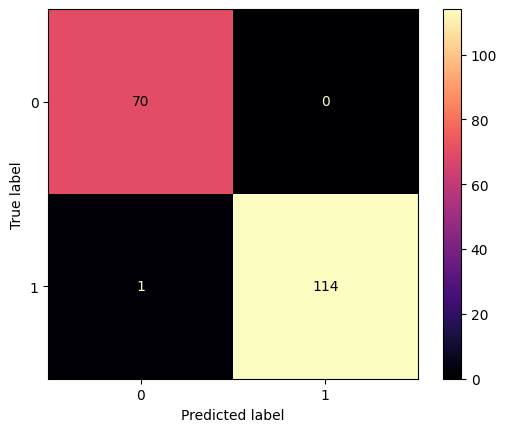

In [ ]:
confusion_matrix_display,report= model_performance(y_test_pred, y_test)